In [1]:
# Model performansını değerlendirmek için metrikler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Görselleştirme için (opsiyonel)
import matplotlib.pyplot as plt
from sklearn import tree

# Temel kütüphaneler
import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme ve analiz için

# Veriyi bölme işlemleri için
from sklearn.model_selection import train_test_split

# Karar Ağacı Sınıflandırıcısı için
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Veri Setimizi Yükleyelim
data=pd.read_csv('diabetes.csv')

In [3]:
#Veri Seti Hakkında Bilgi Alalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Veri Seti Hakkında Eksik Kontrolü
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Veri Seti Hakkında İstatiksel Özet
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#iLK 5 Satır Hakkında Bilgi
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Son 5 Satır Hakkında Bilgi
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
#Bağımsız Değişkenler 
X=data.drop(columns=['Outcome'])

#Bağımlı Değişken
y=data['Outcome']

In [9]:
#Veriyi Test ve Eğitim Olarak Bölme
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
#Modelimizi Kuralım
model=DecisionTreeClassifier(criterion='gini',random_state=42)

In [11]:
#Modelimizi Eğitelim
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
#Tahminleme Yapalım
y_pred=model.predict(X_test)

In [13]:
#Ölçüm Parametrelerini Kullanalım
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy Score:',accuracy)

print("-------------------------------")
confusion=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",confusion)

print("-----------------------------")
report=classification_report(y_test,y_pred)
print("Report:",report)

Accuracy Score: 0.7467532467532467
-------------------------------
Confusion Matrix: [[75 24]
 [15 40]]
-----------------------------
Report:               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.10096153846153846, 0.75, 'BloodPressure <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.09134615384615384, 0.67

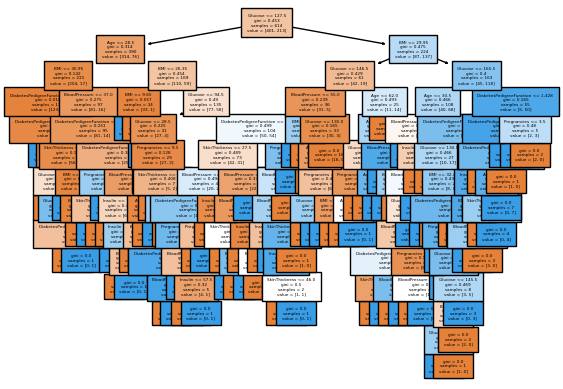

In [14]:
#Görselleştirme
plt.title("GİNİ Algoritması Görselleştirmesi")
tree.plot_tree(model,feature_names=X.columns,filled=True,fontsize=3)

